# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [17]:
#建立模型
inputs = Input(shape = [784,])
d1 = Dense(units=256, activation="relu")(inputs)
d2 = Dense(units=512, activation="relu")(d1)
classify = Dense(units=10, activation="softmax")(d2)

model = Model(inputs=[inputs], outputs=[classify])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 412us/step - loss: 0.2171 - acc: 0.9347 - val_loss: 0.1067 - val_acc: 0.9682
Epoch 2/10
48000/48000 [==============================] - 18s 372us/step - loss: 0.0887 - acc: 0.9726 - val_loss: 0.1028 - val_acc: 0.9694
Epoch 3/10
48000/48000 [==============================] - 20s 414us/step - loss: 0.0639 - acc: 0.9796 - val_loss: 0.0865 - val_acc: 0.9757
Epoch 4/10
48000/48000 [==============================] - 20s 417us/step - loss: 0.0464 - acc: 0.9855 - val_loss: 0.1023 - val_acc: 0.9719
Epoch 5/10
48000/48000 [==============================] - 17s 364us/step - loss: 0.0365 - acc: 0.9883 - val_loss: 0.1062 - val_acc: 0.9733
Epoch 6/10
48000/48000 [==============================] - 18s 368us/step - loss: 0.0308 - acc: 0.9898 - val_loss: 0.1023 - val_acc: 0.9759
Epoch 7/10
48000/48000 [==============================] - 17s 363us/step - loss: 0.0271 - acc: 0.9911 - val_loss: 0.

# 以圖形顯示訓練過程

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

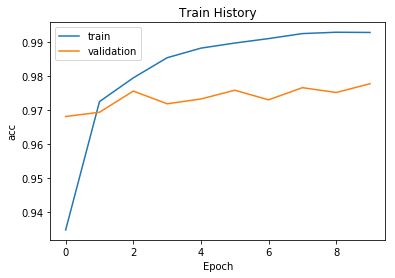

In [22]:
show_train_history(train_history,'acc','val_acc')

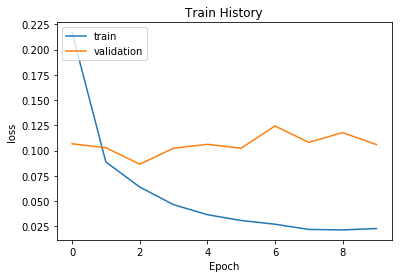

In [23]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 121us/step

accuracy= 0.9804
